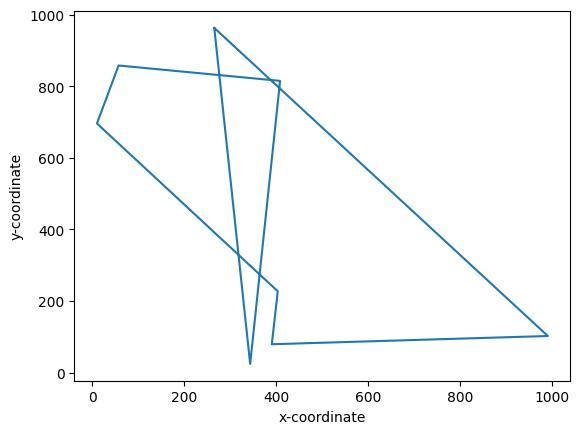

4744.69248044646


In [37]:
import matplotlib.pyplot as plt

def viz(P):
    '''function viz(P) that plots nxn grid'''
    # append the first tuple to close the tour
    P.append((P[0][0], P[0][1]))
    # unzip the list of tuples
    # and assigns to x and y
    x, y = zip(*P)

    # x and y labels
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')

    # plot the coordinates x and y
    plt.plot(x,y)
    plt.show()
    

def tour_length(P):
    '''function tour_length(P) that given a list of points P 
        computes the total length of the tour'''
    # append the first tuple to close the tour
    P.append((P[0][0], P[0][1]))
    # list used to store each distance traversing from one node to another node
    dist = []
    # loop through all the tuples in the list P (original)
    for i in range(len(P) - 1):
        # extract x1, y1, x2, y2
        x1 = P[i][0]
        y1 = P[i][1]
        x2 = P[i+1][0]
        y2 = P[i+1][1]
        # compute and append distance between consecutive points
        dist.append((((x2-x1)**2)+((y2-y1)**2))**0.5)
    # returns the sum of all the distances calculated
    return sum(dist)
        

P = [(265, 963), (343, 24), (408, 815), (57, 858), (10, 696), (403, 227), (390, 79), (990, 102)]
viz(P)
print(tour_length(P))

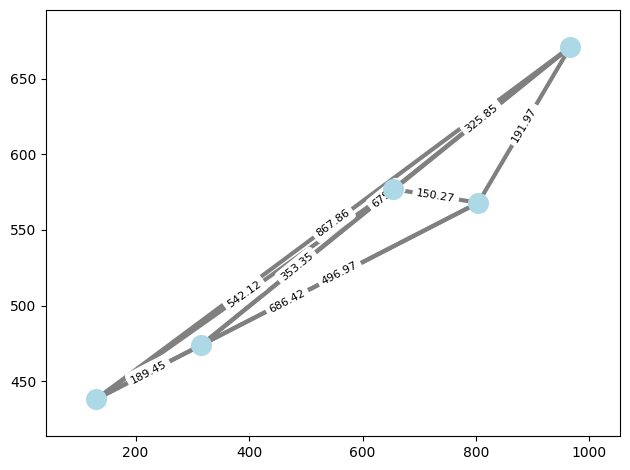

([(966, 671), (804, 568), (654, 577), (316, 474), (130, 438), (966, 671)], 1752.9007066252698)


In [48]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import tree

def approx_TSP(P):
    '''function approx_TSP(P) which takes a list P of points, and returns a pair (tour, length)'''
    # creates an empty networkx graph
    G = nx.Graph()

    # loops through each tuples in P
    for i in range(len(P)):
        # loops from i+1 tuple in P 
        for j in range(i+1, len(P)):
            # extract x1, y1, x2, y2
            x1 = P[i][0]
            y1 = P[i][1]
            x2 = P[j][0]
            y2 = P[j][1] 
            # compute the distance between the pair
            wt = round((((x2-x1)**2)+((y2-y1)**2))**0.5,2)
            # add edges and weights to graph G 
            G.add_edge(P[i], P[j], weight=wt)

    # node: node creates a dictionary that stores node as keys
    # node position (x,y coordinates) as values which are the same
    # extracted from the G.nodes
    pos = {node: node for node in G.nodes}
    # hide_ticks=False shows the x,y axes
    # draws the nodes 
    nx.draw_networkx_nodes(G, pos, node_size=200, node_color='lightblue', hide_ticks= False)
    # draws edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=3, edge_color='grey', hide_ticks= False)
    # draw labels to show node names
    # nx.draw_networkx_labels(G, pos, font_size=9, font_family="sans-serif", hide_ticks= False)
    # get edge labels as weights we calculated
    edge_labels = nx.get_edge_attributes(G, "weight")
    # draw the edge labels
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8, hide_ticks= False)

    plt.tight_layout()
    plt.show()

    # Find MST using the minimum_spanning_edges function
    mst = tree.minimum_spanning_edges(G, algorithm="kruskal", data=False)
    # store the MST list of edges as edgelist
    edgelist = list(mst)

    # create a new empty graph
    M = nx.Graph()
    # add the edges using edgelist of MST
    M.add_edges_from(edgelist)
    
    # compute the preorder of that MST
    preorder = list(nx.dfs_preorder_nodes(M, source=P[0]))

    # return returns a pair (tour, length)
    return (preorder, tour_length(preorder))    

P = [(966, 671), (654, 577), (130, 438), (804, 568), (316, 474)]
print(approx_TSP(P))

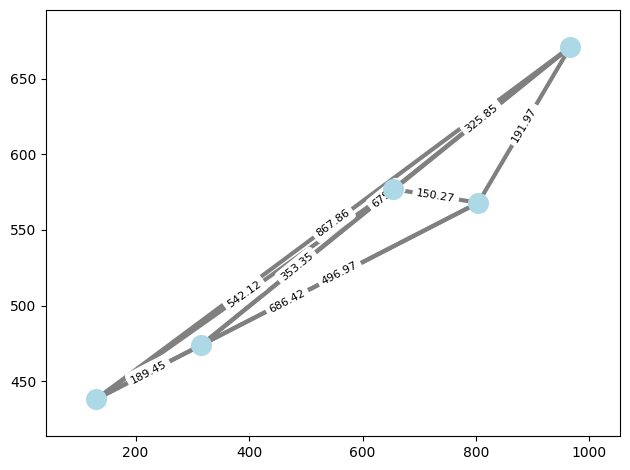

Approximation Ratio for P[5] is: 1.00


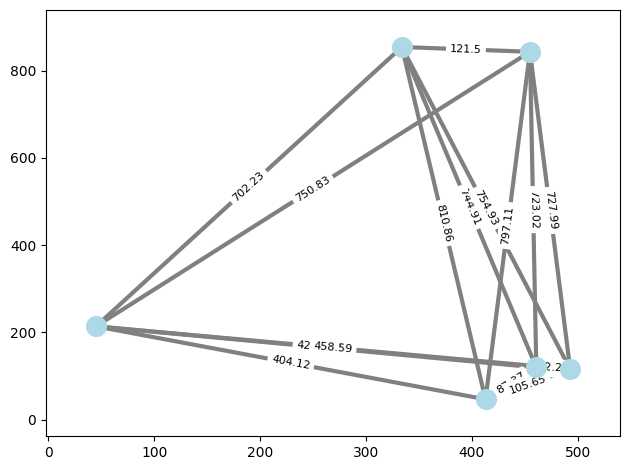

Approximation Ratio for P[6] is: 1.04


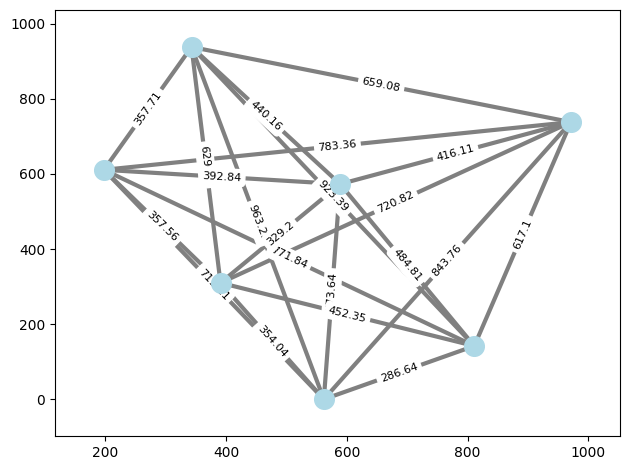

Approximation Ratio for P[7] is: 1.27


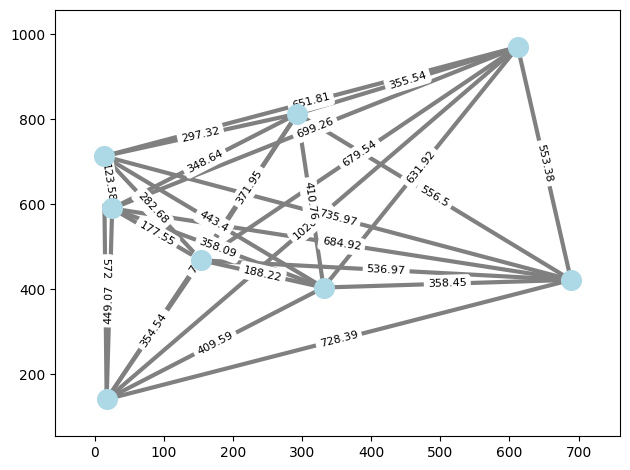

Approximation Ratio for P[8] is: 1.24


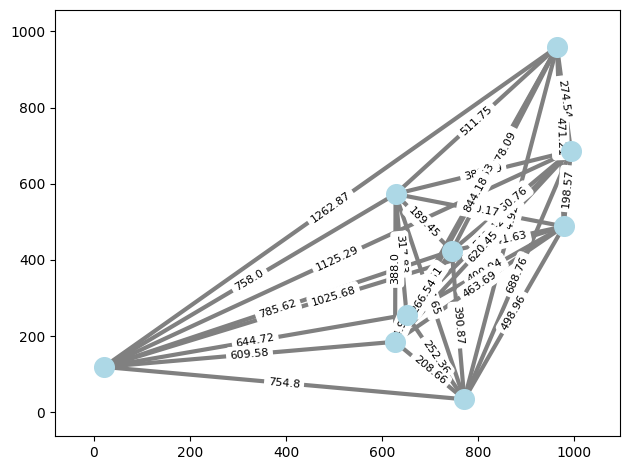

Approximation Ratio for P[9] is: 1.09


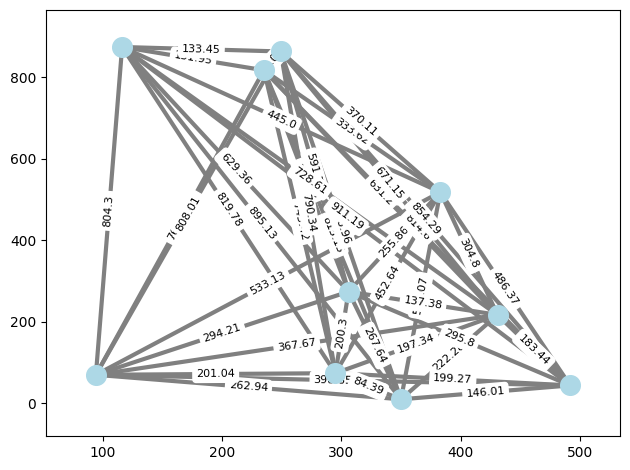

Approximation Ratio for P[10] is: 1.03


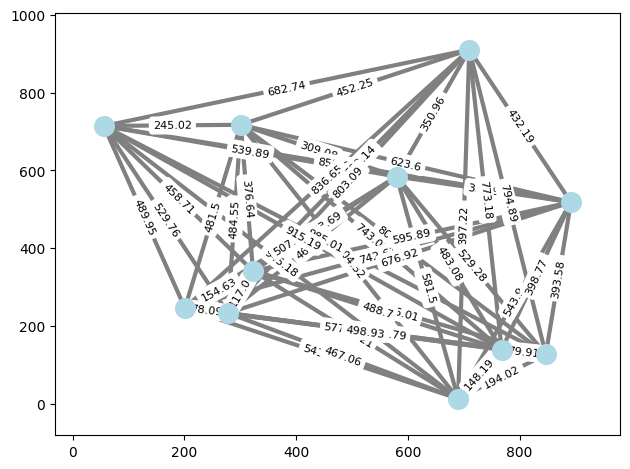

Approximation Ratio for P[11] is: 1.16


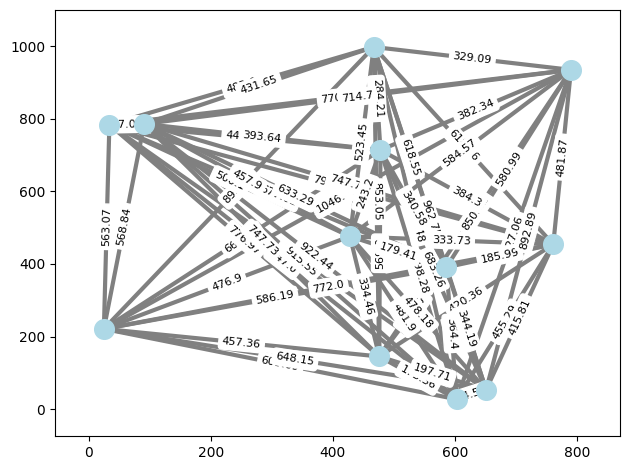

Approximation Ratio for P[12] is: 1.27


In [49]:
P = {}; Best_Tour = {}; best_length = {}

P[5] = [(966, 671), (654, 577), (130, 438), (804, 568), (316, 474)]; Best_Tour[5] = [(966, 671), (804, 568), (316, 474), (130, 438), (654, 577)]; best_length[5] = 1746.3694242823121

P[6] = [(45, 214), (461, 120), (455, 843), (493, 116), (413, 47), (334, 854)]; Best_Tour[6] = [(45, 214), (413, 47), (461, 120), (493, 116), (455, 843), (334, 854)]; best_length[6] = 2075.4532678907003

P[7] = [(562, 0), (343, 938), (971, 738), (198, 611), (589, 573), (811, 142), (391, 310)]; Best_Tour[7] = [(562, 0), (391, 310), (198, 611), (343, 938), (589, 573), (971, 738), (811, 142)]; best_length[7] = 2829.3223258989615

P[8] = [(612, 970), (689, 422), (154, 468), (13, 713), (293, 813), (25, 590), (331, 404), (17, 141)]; Best_Tour[8] = [(612, 970), (689, 422), (331, 404), (17, 141), (154, 468), (25, 590), (13, 713), (293, 813)]; best_length[8] = 2629.965859714055

P[9] = [(771, 34), (745, 424), (21, 119), (993, 686), (651, 256), (628, 573), (627, 185), (978, 488), (964, 959)]; Best_Tour[9] = [(771, 34), (21, 119), (628, 573), (964, 959), (993, 686), (978, 488), (745, 424), (651, 256), (627, 185)]; best_length[9] = 3215.400634092587

P[10] = [(383, 518), (235, 817), (249, 863), (431, 217), (492, 44), (116, 874), (350, 10), (295, 74), (306, 274), (94, 70)]; Best_Tour[10] = [(383, 518), (235, 817), (249, 863), (116, 874), (94, 70), (295, 74), (350, 10), (492, 44), (431, 217), (306, 274)]; best_length[10] = 2327.585195575567

P[11] = [(690, 13), (301, 717), (580, 584), (56, 714), (201, 246), (847, 127), (323, 341), (768, 139), (278, 233), (892, 518), (710, 910)]; Best_Tour[11] = [(690, 13), (278, 233), (201, 246), (323, 341), (56, 714), (301, 717), (580, 584), (710, 910), (892, 518), (847, 127), (768, 139)]; best_length[11] = 3117.4154088636965

P[12] = [(25, 221), (34, 784), (476, 145), (603, 27), (467, 998), (586, 391), (91, 786), (761, 454), (478, 714), (790, 935), (651, 53), (428, 476)]; Best_Tour[12] = [(25, 221), (476, 145), (603, 27), (651, 53), (761, 454), (586, 391), (428, 476), (478, 714), (790, 935), (467, 998), (91, 786), (34, 784)]; best_length[12] = 3472.905816952695

for i in range(5, 13):
    approx_ratio = approx_TSP(P[i])[1]/best_length[i]
    print(f'Approximation Ratio for P[{i}] is: {approx_ratio:.2f}')

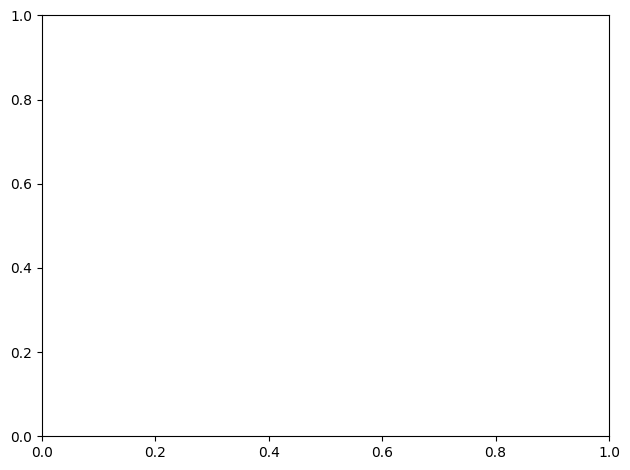

NetworkXError: The node (691, 840) is not in the graph.

In [51]:
# generate random coordinates
import random
import time

def gen_ran_cor(k):
    return [(random.randint(0, 1000), random.randint(0, 1000)) for _ in range(k)]

time_taken = 0
for k in range(1, 100):
    if time_taken < 2:
        P = gen_ran_cor(k)
        t1 = time.time()
        approx_TSP(P)
        time_taken = time.time() - t1
        print(f"k = {k}, Time Taken = {time_taken:.4f} seconds")
    else:
        break
        